In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_excel('Data_Train.xlsx')
df_train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [3]:
df_test = pd.read_excel('Data_Test.xlsx')
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [4]:
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [5]:
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
TITLE            12690 non-null object
RESTAURANT_ID    12690 non-null int64
CUISINES         12690 non-null object
TIME             12690 non-null object
CITY             12578 non-null object
LOCALITY         12592 non-null object
RATING           12688 non-null object
VOTES            11486 non-null object
COST             12690 non-null int64
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
TITLE            4231 non-null object
RESTAURANT_ID    4231 non-null int64
CUISINES         4231 non-null object
TIME             4231 non-null object
CITY             4196 non-null object
LOCALITY         4201 non-null object
RATING           4229 non-null object
VOTES            3829 non-null object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [8]:
df_train['Data']='Train'
df_test['Data']='Test'
df_test['COST']=0

In [9]:
df_price=pd.concat([df_train,df_test])
df_price.head()

,CITY,COST,CUISINES,Data,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200,"Malwani, Goan, North Indian",Train,Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes
1,Chennai,1500,"Asian, Modern Indian, Japanese",Train,Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes
2,Chennai,800,"North Indian, Chinese, Biryani, Hyderabadi",Train,Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes
3,Mumbai,800,"Tibetan, Chinese",Train,Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes
4,Mumbai,300,Desserts,Train,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes


In [10]:
df_price.shape

(16921, 10)

In [11]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 10 columns):
CITY             16774 non-null object
COST             16921 non-null int64
CUISINES         16921 non-null object
Data             16921 non-null object
LOCALITY         16793 non-null object
RATING           16917 non-null object
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            15315 non-null object
dtypes: int64(2), object(8)
memory usage: 1.4+ MB


In [12]:
df_price.dtypes

CITY             object
COST              int64
CUISINES         object
Data             object
LOCALITY         object
RATING           object
RESTAURANT_ID     int64
TIME             object
TITLE            object
VOTES            object
dtype: object

In [13]:
df_price.isnull().sum()
#City,Locality,Rating and Votes have null values

CITY              147
COST                0
CUISINES            0
Data                0
LOCALITY          128
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
dtype: int64

In [14]:
#Values counts 
for column in df_price.columns:
    print("********")
    print(column,":",df_price[column].unique())
    print(df_price[column].value_counts())

********
CITY : ['Thane' 'Chennai' 'Mumbai' 'Bangalore' 'Gurgaon' 'Hyderabad' 'Kochi'
 'Thane West' 'Andheri Lokhandwala' 'New Delhi' 'Andheri West'
 'Malad East' '682036' 'Bangalor' 'Navi Mumbai' 'Bandra West' 'Delhi'
 'Noida' 'Bangalore-560066' 'Secunderabad' nan 'India' 'Madhuranagar'
 'Chennai Teynampet' 'Faridabad' 'Chembur.' 'Maharashtra'
 'opp gurudwara Shakurpur' 'Telagana Land Line:040-48507016' 'Ghaziabad'
 'Karnataka' 'Kerala' 'Edappally' 'Kadavanthra' 'Ernakulam Circle kochi'
 'Bengalore' 'Near Reliance Fresh' 'Kilpauk' 'Bengaluru' 'Kothaguda'
 'Goregaon West' 'Banglore' 'Tamil Nadu' 'Kakkanad' 'Kochi Elamkulam'
 'Outer Ring Road' 'Mulund East'
 'Secunderabad main road near signal NMREC COLLEGE' 'Telangana'
 'Ponnuruni Kochi' 'Gachibowli' 'Semmancheri'
 '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034'
 'Mumbai Mahim' 'Powai (Next to Powai Plaza)' 'Dombivali East'
 'Kochi Vyttila' 'Kandivali' 'Kochi Palarivattom' 'Dewan Rama Road'
 'Gurugram' 'Sector 51 Noida'

In [15]:
#Filling city and locality null values with None
df_price['CITY'].fillna('None',inplace=True)
df_price['LOCALITY'].fillna('None',inplace=True)

In [16]:
df_price.isnull().sum()

CITY                0
COST                0
CUISINES            0
Data                0
LOCALITY            0
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
dtype: int64

In [17]:
#Rating column has New,nan and - , replacing them with mode
df_price['RATING'].mode()

0    3.9
dtype: object

In [18]:
df_price['RATING'].replace({'NEW': 3.9,'-':3.9},inplace=True)

In [19]:
df_price['RATING'].fillna(3.9,inplace=True)

In [20]:
df_price['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', 3.9,
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', '3.1', '2.5', '4.6',
       '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4', '2.3',
       '2.0', '2.1', '2.2'], dtype=object)

In [21]:
#Converting it into float
df_price['RATING']=df_price['RATING'].astype(float)

In [22]:
df_price.dtypes

CITY              object
COST               int64
CUISINES          object
Data              object
LOCALITY          object
RATING           float64
RESTAURANT_ID      int64
TIME              object
TITLE             object
VOTES             object
dtype: object

In [23]:
#Votes column
df_price.isnull().sum()

CITY                0
COST                0
CUISINES            0
Data                0
LOCALITY            0
RATING              0
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
dtype: int64

In [24]:
df_price['VOTES'].value_counts()

44 votes      92
22 votes      88
6 votes       87
29 votes      83
24 votes      81
              ..
3213 votes     1
2454 votes     1
1726 votes     1
1438 votes     1
1628 votes     1
Name: VOTES, Length: 2075, dtype: int64

In [25]:
df_price['VOTES'].unique()

array(['49 votes', '30 votes', '221 votes', ..., '2159 votes',
       '3807 votes', '1913 votes'], dtype=object)

In [26]:
#Filling null votes with )
df_price['VOTES'].fillna('0',inplace=True)
df_price['VOTES'].replace({'NaN': '0'},inplace=True)

In [27]:
df_price['VOTES'].isnull().sum()

0

In [28]:
#Removing votes string and converting column into int
df_price['VOTES']=df_price['VOTES'].str.split(' ').str[0].astype(int)

In [29]:
df_price

,CITY,COST,CUISINES,Data,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200,"Malwani, Goan, North Indian",Train,Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49
1,Chennai,1500,"Asian, Modern Indian, Japanese",Train,Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30
2,Chennai,800,"North Indian, Chinese, Biryani, Hyderabadi",Train,Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221
3,Mumbai,800,"Tibetan, Chinese",Train,Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24
4,Mumbai,300,Desserts,Train,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165
...,...,...,...,...,...,...,...,...,...,...
4226,New Delhi,0,"North Indian, Mughlai, Chinese",Test,Punjabi Bagh,3.9,9057,11:30am – 11:30pm (Mon-Sun),CASUAL DINING,287
4227,Bangalore,0,"Biryani, North Indian, Sandwich, Salad, Wraps",Test,HSR Layout,4.3,1247,11am – 1am (Mon-Sun),None,469
4228,Faridabad,0,"Continental, North Indian",Test,Sector 86,3.7,8617,9:30am – 10:30pm (Mon-Sun),QUICK BITES,53
4229,Kochi,0,"Rolls, Beverages",Test,Kochi,3.9,6485,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,0


In [30]:
df_price.dtypes

CITY              object
COST               int64
CUISINES          object
Data              object
LOCALITY          object
RATING           float64
RESTAURANT_ID      int64
TIME              object
TITLE             object
VOTES              int32
dtype: object

In [31]:
 df_price['CUISINES'].value_counts()

North Indian                                                           716
North Indian, Chinese                                                  714
South Indian                                                           706
Fast Food                                                              364
Chinese                                                                226
                                                                      ... 
Biryani, Chinese, North Indian, Asian, South Indian, BBQ, Beverages      1
Salad, Healthy Food, Beverages, Continental                              1
Cafe, Bakery, Burger                                                     1
BBQ, North Indian, European, Mediterranean                               1
Cafe, American, Italian                                                  1
Name: CUISINES, Length: 5183, dtype: int64

In [32]:
df_price['CUISINES'].unique()

array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'European, Mediterranean, Italian, Sushi',
       'North Indian, Chinese, Kebab, Juices', 'Sindhi, Street Food'],
      dtype=object)

In [33]:
cuisines = list(df_price['CUISINES'])
cuisines

['Malwani, Goan, North Indian',
 'Asian, Modern Indian, Japanese',
 'North Indian, Chinese, Biryani, Hyderabadi',
 'Tibetan, Chinese',
 'Desserts',
 'North Indian, Chinese, Seafood, Biryani',
 'Cafe, Chinese, Pizza, North Indian, Burger',
 'Bar Food',
 'South Indian, North Indian',
 'North Indian',
 'North Indian, Chinese, Fast Food, Biryani',
 'Fast Food, Burger, Beverages',
 'Arabian, Mughlai',
 'South Indian',
 'Maharashtrian',
 'Parsi, Hyderabadi',
 'North Indian, Fast Food',
 'North Indian, Hyderabadi, Chinese',
 'Chinese, Thai',
 'Bakery, Fast Food, Momos',
 'Continental, European',
 'North Indian, Rolls, Momos',
 'North Indian, Fast Food, Mughlai, Rolls',
 'Andhra, Chinese, North Indian, Biryani',
 'Cafe, Italian, Chinese',
 'Biryani, North Indian',
 'North Indian, Chinese, BBQ',
 'Italian',
 'Finger Food, North Indian, Continental, Italian',
 'Finger Food, Continental, Asian, North Indian',
 'South Indian, North Indian',
 'Cafe, Tea',
 'Cafe, Continental, European, American, He

In [34]:
max_cuisine = 1
for i in cuisines :
    if len(i.split(',')) > max_cuisine:
         max_cuisine = len(i.split(','))
         
print("Maximum cuisines in a row are: ", max_cuisine) 

Maximum cuisines in a row are:  8


In [35]:
c1=list()
c2=list()
c3=list()
c4=list()
c5=list()
c6=list()
c7=list()
c8=list()
for i in range(len(df_price["CUISINES"])):
    temp=df_price["CUISINES"].iloc[i].split(",")
    try :
        c1.append(temp[0].strip().upper())
    except :
        c1.append('NONE')
    try :
        c2.append(temp[1].strip().upper())
    except :
        c2.append('NONE')
    try :
        c3.append(temp[2].strip().upper())
    except :
        c3.append('NONE')
    try :
        c4.append(temp[3].strip().upper())
    except :
        c4.append('NONE')
    try :
        c5.append(temp[4].strip().upper())
    except :
        c5.append('NONE')
    try :
        c6.append(temp[5].strip().upper())
    except :
        c6.append('NONE')
    try :
        c7.append(temp[6].strip().upper())
    except :
        c7.append('NONE')
    try :
        c8.append(temp[7].strip().upper())
    except :
        c8.append('NONE')

In [36]:
df_price["CUISINES1"]=c1
df_price["CUISINES2"]=c2
df_price["CUISINES3"]=c3
df_price["CUISINES4"]=c4
df_price["CUISINES5"]=c5
df_price["CUISINES6"]=c6
df_price["CUISINES7"]=c7
df_price["CUISINES8"]=c8

In [37]:
df_price

,CITY,COST,CUISINES,Data,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,CUISINES6,CUISINES7,CUISINES8
0,Thane,1200,"Malwani, Goan, North Indian",Train,Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE
1,Chennai,1500,"Asian, Modern Indian, Japanese",Train,Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE
2,Chennai,800,"North Indian, Chinese, Biryani, Hyderabadi",Train,Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE
3,Mumbai,800,"Tibetan, Chinese",Train,Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE
4,Mumbai,300,Desserts,Train,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,New Delhi,0,"North Indian, Mughlai, Chinese",Test,Punjabi Bagh,3.9,9057,11:30am – 11:30pm (Mon-Sun),CASUAL DINING,287,NORTH INDIAN,MUGHLAI,CHINESE,NONE,NONE,NONE,NONE,NONE
4227,Bangalore,0,"Biryani, North Indian, Sandwich, Salad, Wraps",Test,HSR Layout,4.3,1247,11am – 1am (Mon-Sun),None,469,BIRYANI,NORTH INDIAN,SANDWICH,SALAD,WRAPS,NONE,NONE,NONE
4228,Faridabad,0,"Continental, North Indian",Test,Sector 86,3.7,8617,9:30am – 10:30pm (Mon-Sun),QUICK BITES,53,CONTINENTAL,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,NONE
4229,Kochi,0,"Rolls, Beverages",Test,Kochi,3.9,6485,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,0,ROLLS,BEVERAGES,NONE,NONE,NONE,NONE,NONE,NONE


In [38]:
titles = list(df_price['TITLE'])
max_title= 1
for i in titles :
    if len(i.split(',')) > max_title:
         max_title = len(i.split(','))
         
        print("Maximum TITLES in row are ", max_title) 

Maximum TITLES in row are  2


In [39]:
t1=list()
t2=list()
for i in range(len(df_price["TITLE"])):
    temp=df_price["TITLE"].iloc[i].split(",")
    try :
        t1.append(temp[0].strip().upper())
    except :
        t1.append('NONE')
    try :
        t2.append(temp[1].strip().upper())
    except :
        t2.append('NONE')

In [40]:
df_price["TITLE1"]=t1
df_price["TITLE2"]=t2

In [41]:
df_price

,CITY,COST,CUISINES,Data,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,CUISINES6,CUISINES7,CUISINES8,TITLE1,TITLE2
0,Thane,1200,"Malwani, Goan, North Indian",Train,Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,CASUAL DINING,NONE
1,Chennai,1500,"Asian, Modern Indian, Japanese",Train,Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE,CASUAL DINING,BAR
2,Chennai,800,"North Indian, Chinese, Biryani, Hyderabadi",Train,Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE,CASUAL DINING,NONE
3,Mumbai,800,"Tibetan, Chinese",Train,Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE,QUICK BITES,NONE
4,Mumbai,300,Desserts,Train,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,DESSERT PARLOR,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,New Delhi,0,"North Indian, Mughlai, Chinese",Test,Punjabi Bagh,3.9,9057,11:30am – 11:30pm (Mon-Sun),CASUAL DINING,287,NORTH INDIAN,MUGHLAI,CHINESE,NONE,NONE,NONE,NONE,NONE,CASUAL DINING,NONE
4227,Bangalore,0,"Biryani, North Indian, Sandwich, Salad, Wraps",Test,HSR Layout,4.3,1247,11am – 1am (Mon-Sun),None,469,BIRYANI,NORTH INDIAN,SANDWICH,SALAD,WRAPS,NONE,NONE,NONE,NONE,NONE
4228,Faridabad,0,"Continental, North Indian",Test,Sector 86,3.7,8617,9:30am – 10:30pm (Mon-Sun),QUICK BITES,53,CONTINENTAL,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,NONE,QUICK BITES,NONE
4229,Kochi,0,"Rolls, Beverages",Test,Kochi,3.9,6485,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,0,ROLLS,BEVERAGES,NONE,NONE,NONE,NONE,NONE,NONE,QUICK BITES,NONE


In [42]:
#Dropping cuisine and title columns
df_price.drop(columns=["CUISINES","TITLE"],inplace=True)

In [43]:
#Also dropping restuarant id and time
df_price.drop(columns=["RESTAURANT_ID","TIME"],inplace=True)

In [44]:
df_price

,CITY,COST,Data,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,CUISINES6,CUISINES7,CUISINES8,TITLE1,TITLE2
0,Thane,1200,Train,Dombivali East,3.6,49,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,CASUAL DINING,NONE
1,Chennai,1500,Train,Ramapuram,4.2,30,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE,CASUAL DINING,BAR
2,Chennai,800,Train,Saligramam,3.8,221,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE,CASUAL DINING,NONE
3,Mumbai,800,Train,Bandra West,4.1,24,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE,QUICK BITES,NONE
4,Mumbai,300,Train,Lower Parel,3.8,165,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,DESSERT PARLOR,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,New Delhi,0,Test,Punjabi Bagh,3.9,287,NORTH INDIAN,MUGHLAI,CHINESE,NONE,NONE,NONE,NONE,NONE,CASUAL DINING,NONE
4227,Bangalore,0,Test,HSR Layout,4.3,469,BIRYANI,NORTH INDIAN,SANDWICH,SALAD,WRAPS,NONE,NONE,NONE,NONE,NONE
4228,Faridabad,0,Test,Sector 86,3.7,53,CONTINENTAL,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,NONE,QUICK BITES,NONE
4229,Kochi,0,Test,Kochi,3.9,0,ROLLS,BEVERAGES,NONE,NONE,NONE,NONE,NONE,NONE,QUICK BITES,NONE


In [45]:
df_price.isnull().sum()

CITY         0
COST         0
Data         0
LOCALITY     0
RATING       0
VOTES        0
CUISINES1    0
CUISINES2    0
CUISINES3    0
CUISINES4    0
CUISINES5    0
CUISINES6    0
CUISINES7    0
CUISINES8    0
TITLE1       0
TITLE2       0
dtype: int64

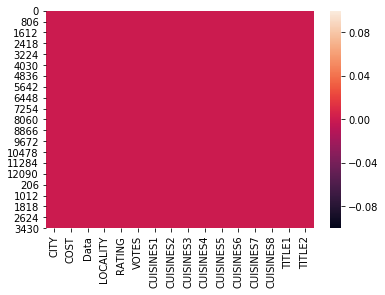

In [46]:
sns.heatmap(df_price.isnull())

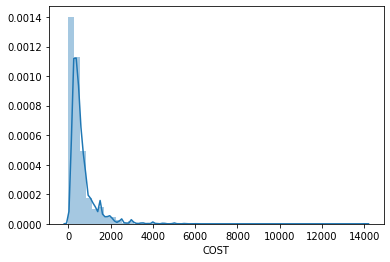

In [47]:
sns.distplot(df_price['COST'])

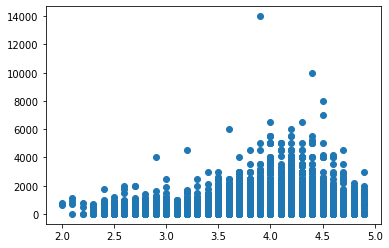

In [48]:
plt.scatter(x='RATING',y='COST',data=df_price)
plt.show()

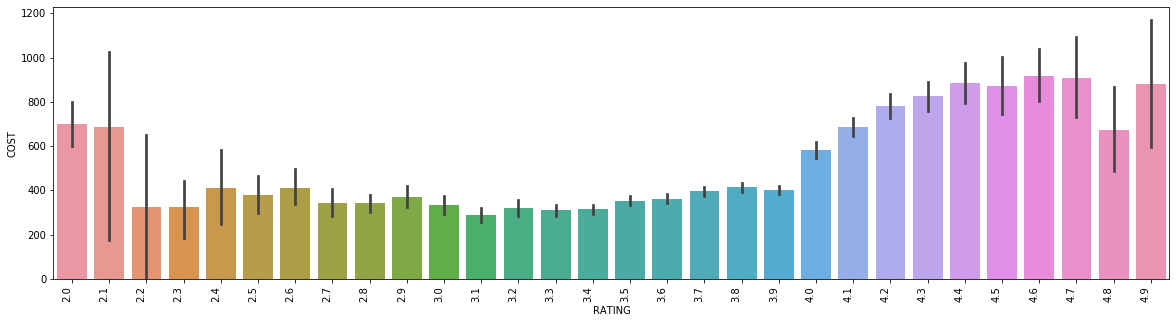

In [49]:
plt.figure(figsize=(20, 5))
rx1=sns.barplot(x='RATING',y='COST',data=df_price)
rx1.set_xticklabels(rx1.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
#High Rating restaurant's have higher food price

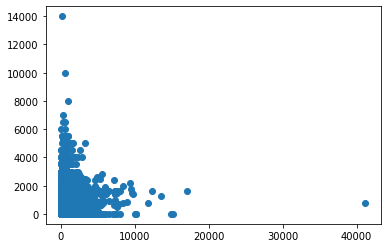

In [50]:
plt.scatter(x='VOTES',y='COST',data=df_price)
plt.show()

In [52]:
#Converting categorical data into Numeric
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_price['CITY']=le.fit_transform(df_price['CITY'])
df_price['LOCALITY']=le.fit_transform(df_price['LOCALITY'])
df_price['CUISINES1']=le.fit_transform(df_price['CUISINES1'])
df_price['CUISINES2']=le.fit_transform(df_price['CUISINES2'])
df_price['CUISINES3']=le.fit_transform(df_price['CUISINES3'])
df_price['CUISINES4']=le.fit_transform(df_price['CUISINES4'])
df_price['CUISINES5']=le.fit_transform(df_price['CUISINES5'])
df_price['CUISINES6']=le.fit_transform(df_price['CUISINES6'])
df_price['CUISINES7']=le.fit_transform(df_price['CUISINES7'])
df_price['CUISINES8']=le.fit_transform(df_price['CUISINES8'])
df_price['TITLE1']=le.fit_transform(df_price['TITLE1'])
df_price['TITLE2']=le.fit_transform(df_price['TITLE2'])

In [53]:
df_price

,CITY,COST,Data,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,CUISINES6,CUISINES7,CUISINES8,TITLE1,TITLE2
0,401,1200,Train,328,3.6,49,61,32,72,64,62,50,41,18,5,16
1,75,1500,Train,1215,4.2,30,6,62,45,64,62,50,41,18,5,1
2,75,800,Train,1273,3.8,221,74,23,14,34,62,50,41,18,5,16
3,277,800,Train,161,4.1,24,102,23,70,64,62,50,41,18,23,16
4,277,300,Train,709,3.8,165,30,67,70,64,62,50,41,18,9,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,316,0,Test,1185,3.9,287,74,64,23,64,62,50,41,18,5,16
4227,42,0,Test,461,4.3,469,15,69,83,73,83,50,41,18,20,16
4228,128,0,Test,1371,3.7,53,29,69,70,64,62,50,41,18,23,16
4229,216,0,Test,642,3.9,0,84,12,70,64,62,50,41,18,23,16


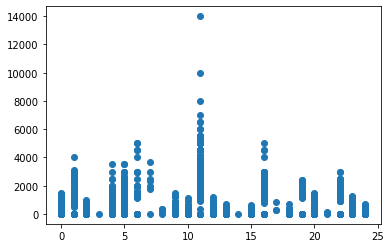

In [54]:
plt.scatter(x='TITLE1',y='COST',data=df_price)
plt.show()

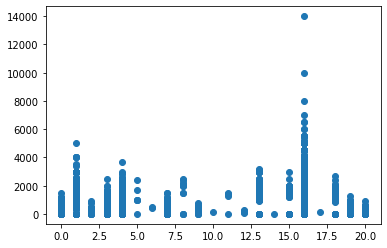

In [55]:
plt.scatter(x='TITLE2',y='COST',data=df_price)
plt.show()

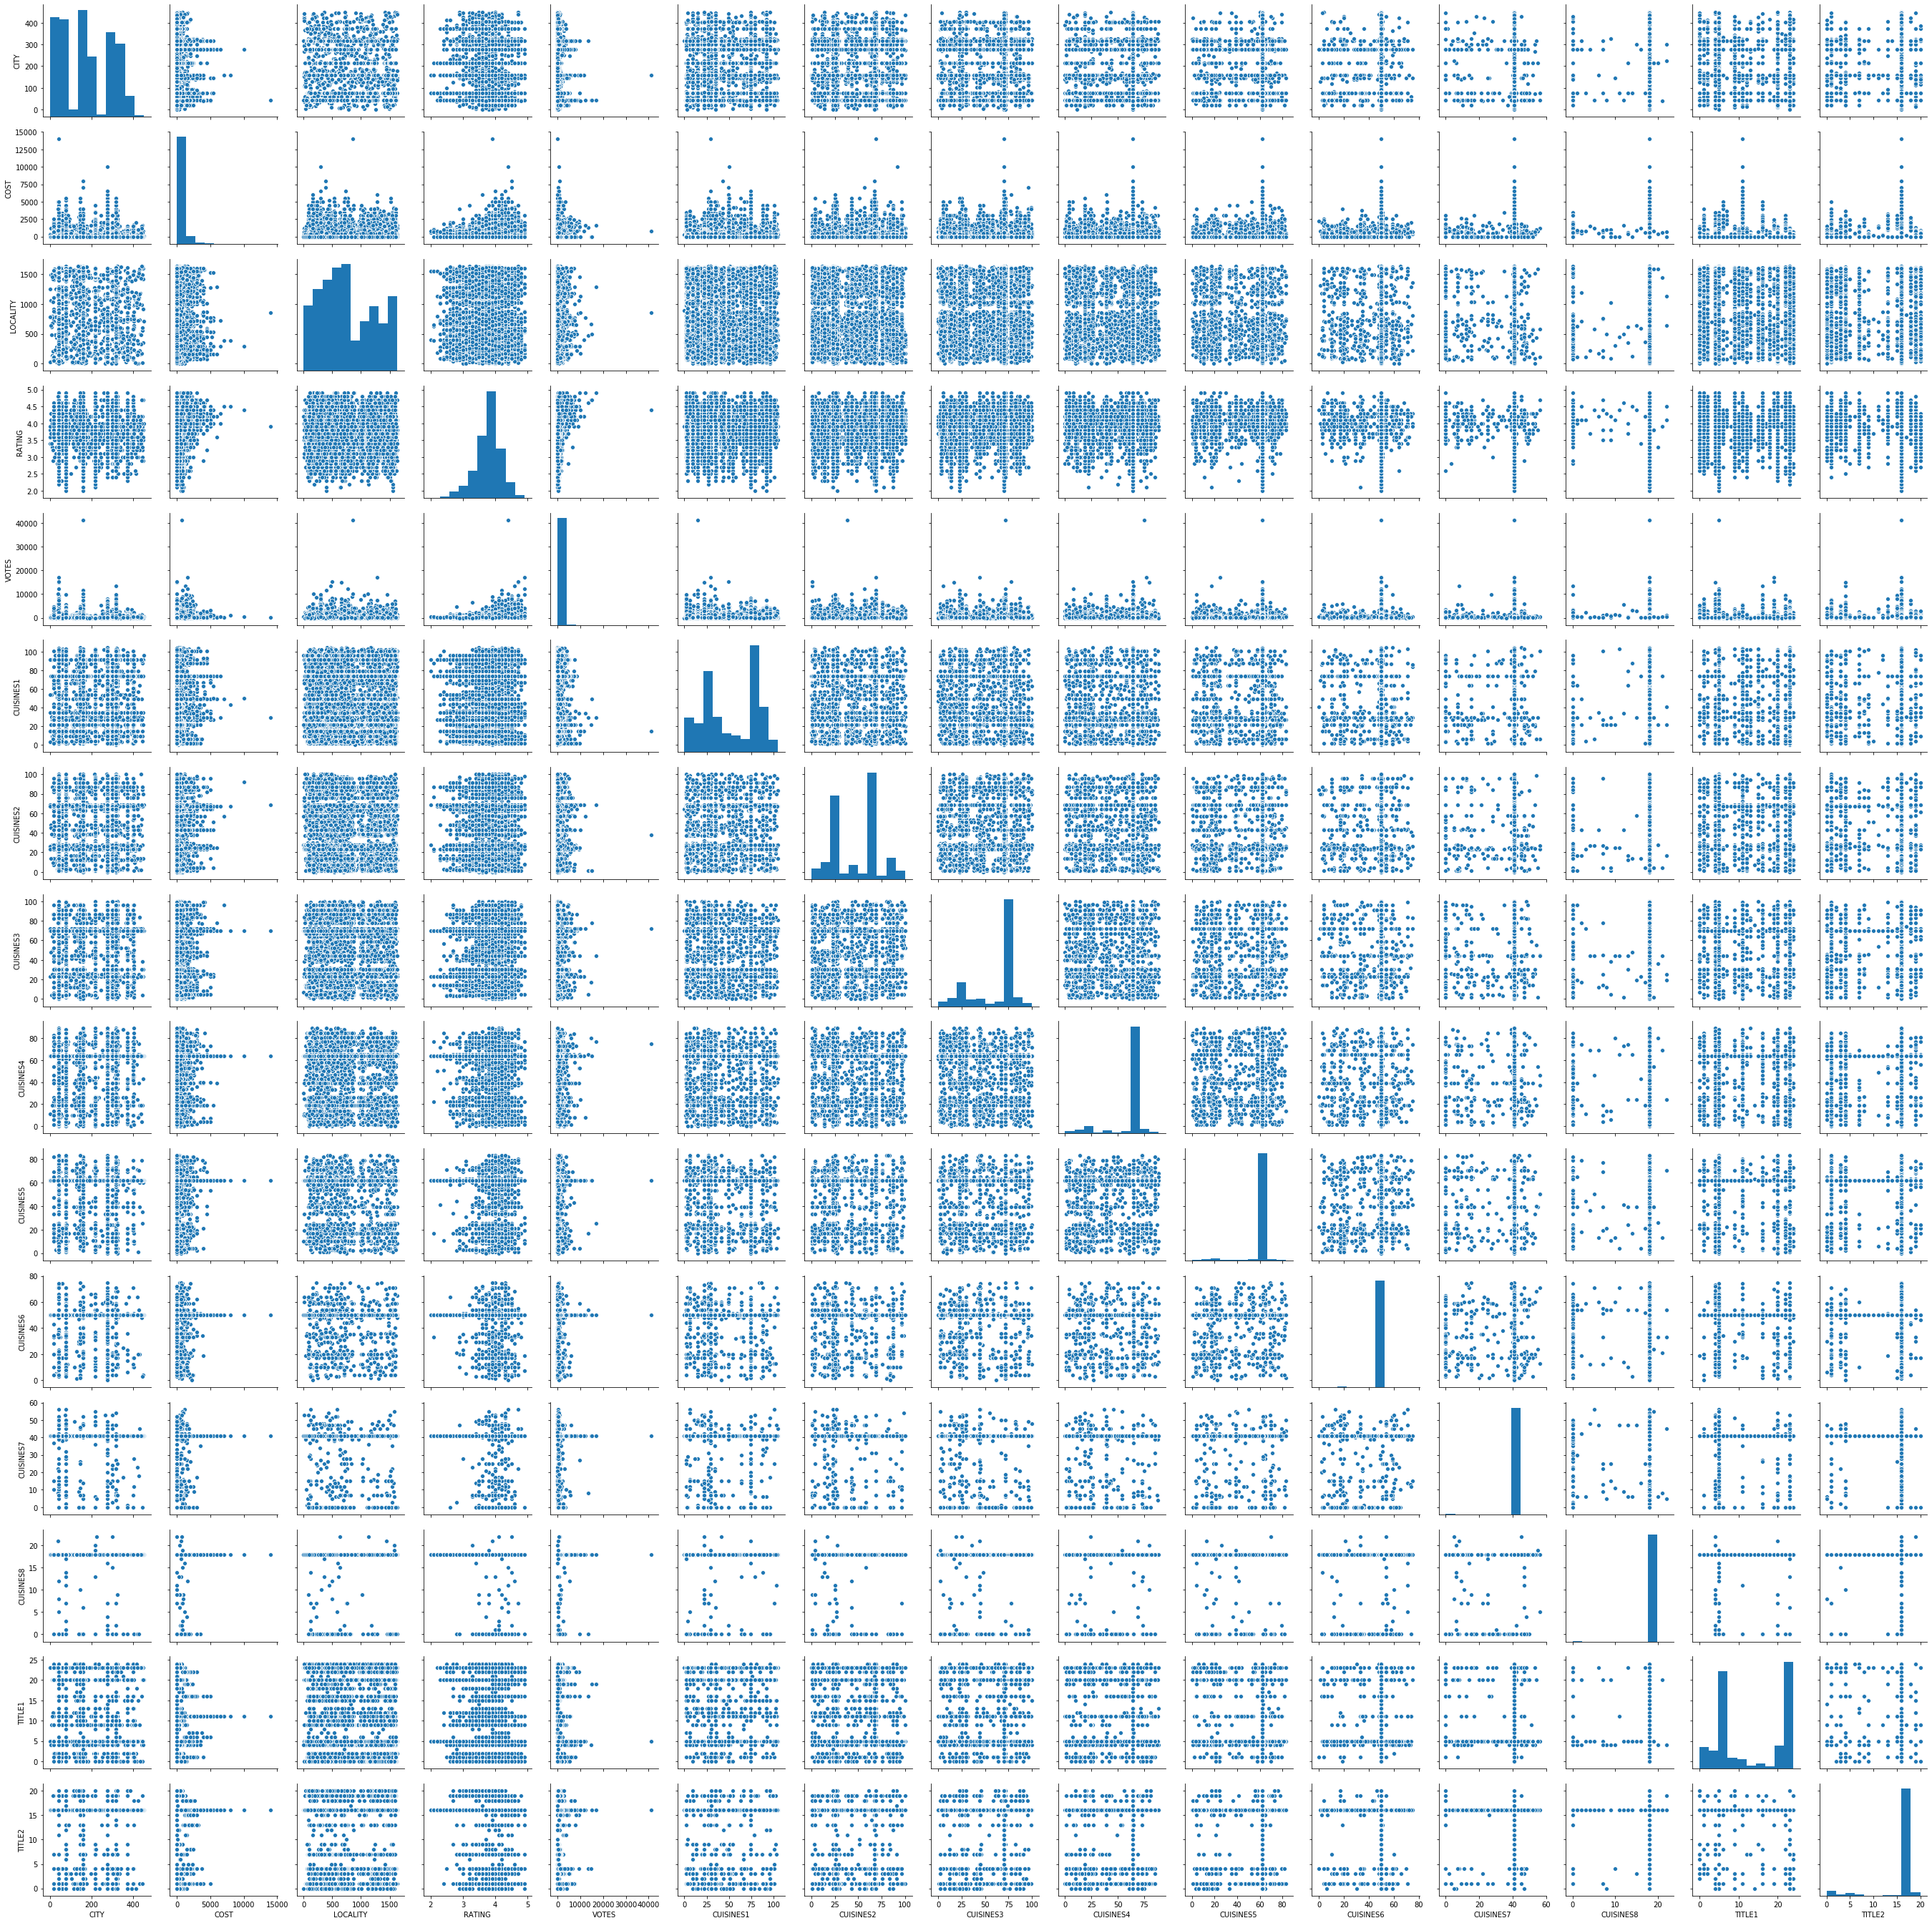

In [56]:
sns.pairplot(df_price)

In [57]:
df_price.corr()

,CITY,COST,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,CUISINES6,CUISINES7,CUISINES8,TITLE1,TITLE2
CITY,1.000000,0.030685,0.040695,0.069528,0.035440,0.011913,0.011727,0.018633,0.008157,0.002395,0.002816,-0.011510,-0.003685,-0.009071,-0.016347
COST,0.030685,1.000000,-0.011122,0.236567,0.194884,-0.028621,-0.020267,-0.093046,-0.093381,-0.057552,-0.029990,-0.027051,-0.028839,-0.227843,-0.208974
LOCALITY,0.040695,-0.011122,1.000000,-0.022485,-0.030933,0.020781,0.015075,0.013928,0.010049,0.008669,0.004494,0.010416,0.012478,0.036857,0.016441
RATING,0.069528,0.236567,-0.022485,1.000000,0.332022,-0.079312,-0.036323,-0.052479,-0.092576,-0.071510,-0.057506,-0.034342,-0.032973,-0.151014,-0.172017
VOTES,0.035440,0.194884,-0.030933,0.332022,1.000000,-0.039570,-0.049129,-0.098260,-0.091543,-0.077902,-0.043380,-0.043354,-0.050660,-0.141966,-0.160494
CUISINES1,0.011913,-0.028621,0.020781,-0.079312,-0.039570,1.000000,0.020799,-0.042443,0.017412,0.011551,0.015586,0.029169,0.031196,0.217776,0.092326
CUISINES2,0.011727,-0.020267,0.015075,-0.036323,-0.049129,0.020799,1.000000,0.043720,0.031463,0.028573,0.034420,0.017962,0.031285,0.108513,0.119892
CUISINES3,0.018633,-0.093046,0.013928,-0.052479,-0.098260,-0.042443,0.043720,1.000000,0.162013,0.097287,0.049297,0.058234,0.064139,0.129720,0.104355
CUISINES4,0.008157,-0.093381,0.010049,-0.092576,-0.091543,0.017412,0.031463,0.162013,1.000000,0.228673,0.131448,0.099004,0.095105,0.111619,0.112447
CUISINES5,0.002395,-0.057552,0.008669,-0.071510,-0.077902,0.011551,0.028573,0.097287,0.228673,1.000000,0.264861,0.204279,0.177653,0.087994,0.079234


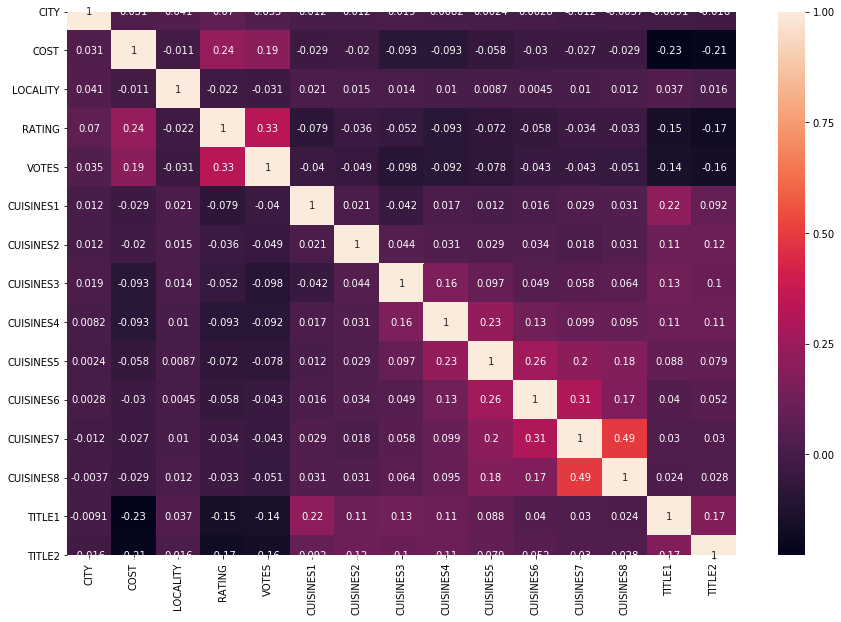

In [59]:
plt.subplots(figsize=(15,10))
sns.heatmap(df_price.corr(),annot=True)
plt.show()

In [60]:
df_price

,CITY,COST,Data,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,CUISINES6,CUISINES7,CUISINES8,TITLE1,TITLE2
0,401,1200,Train,328,3.6,49,61,32,72,64,62,50,41,18,5,16
1,75,1500,Train,1215,4.2,30,6,62,45,64,62,50,41,18,5,1
2,75,800,Train,1273,3.8,221,74,23,14,34,62,50,41,18,5,16
3,277,800,Train,161,4.1,24,102,23,70,64,62,50,41,18,23,16
4,277,300,Train,709,3.8,165,30,67,70,64,62,50,41,18,9,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,316,0,Test,1185,3.9,287,74,64,23,64,62,50,41,18,5,16
4227,42,0,Test,461,4.3,469,15,69,83,73,83,50,41,18,20,16
4228,128,0,Test,1371,3.7,53,29,69,70,64,62,50,41,18,23,16
4229,216,0,Test,642,3.9,0,84,12,70,64,62,50,41,18,23,16


In [61]:
df_train_final=df_price.loc[df_price['Data']=='Train']
df_train_final.drop(['Data'],axis=1,inplace=True)

In [62]:
df_train_final

,CITY,COST,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,CUISINES6,CUISINES7,CUISINES8,TITLE1,TITLE2
0,401,1200,328,3.6,49,61,32,72,64,62,50,41,18,5,16
1,75,1500,1215,4.2,30,6,62,45,64,62,50,41,18,5,1
2,75,800,1273,3.8,221,74,23,14,34,62,50,41,18,5,16
3,277,800,161,4.1,24,102,23,70,64,62,50,41,18,23,16
4,277,300,709,3.8,165,30,67,70,64,62,50,41,18,9,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,160,500,395,3.8,546,74,17,48,64,62,50,41,18,23,16
12686,277,1800,158,4.3,1214,39,25,70,64,62,50,41,18,5,1
12687,300,1300,1549,4.0,608,36,25,5,19,62,50,41,18,16,16
12688,75,400,720,3.5,32,74,87,23,81,62,50,41,18,5,16


In [64]:
#Check for presence of outliers
from scipy.stats import zscore
z_scr=zscore(df_train_final)
print(df_train_final.shape)
df_train_final=df_train_final.loc[(abs(z_scr)<3).all(axis=1)]
print(df_train_final.shape)

(12690, 15)
(10778, 15)


In [65]:
df_train_final.skew()

CITY          0.258531
COST          2.062907
LOCALITY      0.327561
RATING       -0.527585
VOTES         2.740162
CUISINES1    -0.045712
CUISINES2    -0.171993
CUISINES3    -1.181865
CUISINES4    -3.160121
CUISINES5    -6.262522
CUISINES6     9.928702
CUISINES7    53.212347
CUISINES8     0.000000
TITLE1       -0.077677
TITLE2       -4.693676
dtype: float64

In [66]:
#Removing skewness
import numpy as np
for index in df_train_final.skew().index:
    if df_train_final.skew().loc[index]>0.5:
        df_train_final[index]=np.sqrt(df_train_final[index])

In [67]:
df_train_final.skew()

CITY          0.258531
COST          1.155132
LOCALITY      0.327561
RATING       -0.527585
VOTES         1.143418
CUISINES1    -0.045712
CUISINES2    -0.171993
CUISINES3    -1.181865
CUISINES4    -3.160121
CUISINES5    -6.262522
CUISINES6     7.484993
CUISINES7    52.474437
CUISINES8     0.000000
TITLE1       -0.077677
TITLE2       -4.693676
dtype: float64

In [68]:
df_test_final=df_price.loc[df_price['Data']=='Test']
df_test_final.drop(['COST'],axis=1,inplace=True)
df_test_final.drop(['Data'],axis=1,inplace=True)

In [69]:
#Check for presence of outliers
from scipy.stats import zscore
z_scr=zscore(df_test_final)
print(df_test_final.shape)
df_test_final=df_test_final.loc[(abs(z_scr)<3).all(axis=1)]
print(df_test_final.shape)

(4231, 14)
(3639, 14)


In [70]:
df_test_final.skew()

CITY          0.204523
LOCALITY      0.344511
RATING       -0.542813
VOTES         2.649557
CUISINES1    -0.085483
CUISINES2    -0.091009
CUISINES3    -1.208647
CUISINES4    -3.066951
CUISINES5    -5.389360
CUISINES6    -2.583643
CUISINES7    45.030034
CUISINES8     0.000000
TITLE1       -0.048682
TITLE2       -5.000008
dtype: float64

In [71]:
#Removing skewness
import numpy as np
for index in df_test_final.skew().index:
    if df_test_final.skew().loc[index]>0.5:
        df_test_final[index]=np.sqrt(df_test_final[index])

In [72]:
df_test_final

,CITY,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,CUISINES6,CUISINES7,CUISINES8,TITLE1,TITLE2
0,323,1315,4.3,23.748684,74,23,67,43,62,50,6.403124,18,5,16
1,277,429,4.2,7.810250,92,28,78,65,62,50,6.403124,18,23,16
2,277,774,3.8,18.708287,74,84,14,19,62,50,6.403124,18,5,16
3,128,846,3.8,38.013156,15,67,70,64,62,50,6.403124,18,20,16
4,216,570,3.6,4.795832,92,48,70,64,62,50,6.403124,18,23,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,316,1185,3.9,16.941074,74,64,23,64,62,50,6.403124,18,5,16
4227,42,461,4.3,21.656408,15,69,83,73,83,50,6.403124,18,20,16
4228,128,1371,3.7,7.280110,29,69,70,64,62,50,6.403124,18,23,16
4229,216,642,3.9,0.000000,84,12,70,64,62,50,6.403124,18,23,16


In [73]:
df_x=df_train_final.drop(['COST'],axis=1)
df_x.head()

,CITY,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,CUISINES6,CUISINES7,CUISINES8,TITLE1,TITLE2
0,401,328,3.6,7.000000,61,32,72,64,62,7.071068,6.403124,18,5,16
2,75,1273,3.8,14.866069,74,23,14,34,62,7.071068,6.403124,18,5,16
3,277,161,4.1,4.898979,102,23,70,64,62,7.071068,6.403124,18,23,16
4,277,709,3.8,12.845233,30,67,70,64,62,7.071068,6.403124,18,9,16
7,146,1329,4.3,40.149720,10,67,70,64,62,7.071068,6.403124,18,19,16


In [74]:
df_y=df_train_final['COST']
df_y.head()

0    34.641016
2    28.284271
3    28.284271
4    17.320508
7    40.000000
Name: COST, dtype: float64

In [79]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,df_y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, df_y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [80]:
from sklearn.model_selection import cross_val_score
def model_evaluation(model,df_x,df_y):
    cvs=cross_val_score(model,df_x,df_y,cv=5,scoring="r2")
    print("Mean r2 score : ",cvs.mean())
    print("standard deviation in r2 score for regressor: ",cvs.std())
    print(cvs)

In [81]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
r_state = maxr2_score(lg,df_x,df_y)

max r2 score corresponding to  83  is  0.3750099848047178


In [82]:
model_evaluation(lg,df_x,df_y)

Mean r2 score :  0.33194415576309366
standard deviation in r2 score for regressor:  0.012304649627235128
[0.31409993 0.34760326 0.33522175 0.32185699 0.34093885]


In [84]:
#AdaBoost regressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor(base_estimator =lg)
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
ada_1 = GridSearchCV(ada_reg,parameters,cv=5)
ada_1.fit(df_x,df_y)
ada_1.best_params_

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.001, 'n_estimators': 100}

In [87]:
add_reg=AdaBoostRegressor(base_estimator=lg,learning_rate=0.001,n_estimators=100)
print("Mean r2 score for Ada boosting Regression: ",cross_val_score(ada_reg,df_x,df_y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Ada boosting Regression: ",cross_val_score(ada_reg,df_x,df_y,cv=5,scoring="r2").std())

Mean r2 score for Ada boosting Regression:  0.27357201762018557
Standard deviation in r2 score for Ada boosting Regression:  478111.71179478196


In [88]:
r_state=maxr2_score(ada_reg,df_x,df_y)

max r2 score corresponding to  78  is  0.34544843405732206


In [89]:
#KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
r_state=maxr2_score(knr,df_x,df_y)

max r2 score corresponding to  87  is  0.2441906571920811


In [90]:
model_evaluation(knr,df_x,df_y)

Mean r2 score :  0.20558087553395676
standard deviation in r2 score for regressor:  0.03200676276324294
[0.1494926  0.2424565  0.22991596 0.20065937 0.20537996]


In [91]:
#GridSearch CV on KNN regressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
knr_cv = GridSearchCV(knr,neighbors,cv=10)
knr_cv.fit(df_x,df_y)
knr_cv.best_params_

{'n_neighbors': 8}

In [93]:
knr_gcv = KNeighborsRegressor(n_neighbors=8)
r_state = maxr2_score(knr_gcv,df_x,df_y)

max r2 score corresponding to  64  is  0.25298378643557184


In [94]:
model_evaluation(knr_gcv,df_x,df_y)

Mean r2 score :  0.21890810507172076
standard deviation in r2 score for regressor:  0.020998087786715768
[0.18453858 0.24063881 0.24125877 0.2125692  0.21553516]


In [95]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()  
r_state = maxr2_score(dtr,df_x,df_y)

max r2 score corresponding to  80  is  0.4370746810724302


In [96]:
model_evaluation(dtr,df_x,df_y)

Mean r2 score :  0.3597431683579343
standard deviation in r2 score for regressor:  0.013396932103122757
[0.35286877 0.34471854 0.38425711 0.35527027 0.36160116]


In [99]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20],
              "max_depth": [2,8],
              "min_samples_leaf": [20,50],
              "max_leaf_nodes": [5, 20]
              }
grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5)
grid_cv_dtr.fit(df_x,df_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 8],
                         'max_leaf_nodes': [5, 20],
                         'min_samples_leaf': [20, 50],
                         'min_

In [100]:
print(grid_cv_dtr.best_score_)
print(grid_cv_dtr.best_params_)

0.5329406410554934
{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [101]:
dtr_gcv = DecisionTreeRegressor(criterion='mse',max_depth=8,max_leaf_nodes=20,min_samples_leaf=20,min_samples_split=10)
r_state = maxr2_score(dtr_gcv,df_x,df_y)

max r2 score corresponding to  56  is  0.6007780292937512


In [102]:
model_evaluation(dtr_gcv,df_x,df_y)

Mean r2 score :  0.5329463033844027
standard deviation in r2 score for regressor:  0.0415112184915733
[0.52256152 0.48838577 0.52686304 0.51538164 0.61153955]


In [103]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
r_state = maxr2_score(rf,df_x,df_y)

max r2 score corresponding to  56  is  0.6768469196719893


In [104]:
model_evaluation(rf,df_x,df_y)

Mean r2 score :  0.636010073063311
standard deviation in r2 score for regressor:  0.016436632381906673
[0.64199255 0.61350572 0.64280353 0.62196521 0.65978336]


In [105]:
parameters= {'bootstrap': [True, False],
             'max_depth': [10,40],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1,4],
             'min_samples_split': [5,10],
             'n_estimators': [10,50]}

rf_cv = RandomForestRegressor()
rf_random = GridSearchCV(rf, parameters,refit = True, verbose = 3)
rf_random.fit(df_x,df_y)
rf_random.best_params_

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=0.633, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=0.654, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=0.661, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.646, total=   1.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.667, total=   1.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.663, total=   1.0s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estima

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.552, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, score=0.529, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, score=0.502, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, score=0.538, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estima

[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, score=0.663, total=   0.4s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, score=0.657, total=   2.7s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, score=0.673, total=   1.2s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, score=0.676, total=   1.4s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_

[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.607, total=   1.6s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=0.574, total=   0.3s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=0.628, total=   0.3s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=0.613, total=   0.3s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_spli

[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, score=0.540, total=   0.1s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.555, total=   0.4s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.543, total=   0.4s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.553, total=   0.5s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, 

[CV]  bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, score=0.525, total=   1.7s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=0.590, total=   0.2s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=0.572, total=   0.2s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=0.595, total=   0.2s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, 

[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:  2.2min finished


{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

In [106]:
print(rf_random.best_score_)
print(rf_random.best_params_)

0.6725565403358317
{'bootstrap': True, 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [107]:
rf_gcv = RandomForestRegressor(bootstrap='True',max_depth=40,min_samples_leaf=1,n_estimators=5,min_samples_split=10,max_features='auto')
r_state = maxr2_score(rf_gcv,df_x,df_y)

max r2 score corresponding to  56  is  0.6851164186124353


In [108]:
model_evaluation(rf_gcv,df_x,df_y)

Mean r2 score :  0.635579418469451
standard deviation in r2 score for regressor:  0.0177596738756934
[0.63331127 0.61530151 0.64688082 0.61918187 0.66322161]


In [110]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
r_state = maxr2_score(gbr,df_x,df_y)

max r2 score corresponding to  47  is  0.6757598048467264


In [111]:
model_evaluation(gbr,df_x,df_y)

Mean r2 score :  0.6327656217107498
standard deviation in r2 score for regressor:  0.012910827979231519
[0.62864288 0.61884882 0.63947962 0.62240403 0.65445277]


In [118]:
parameterGBR={
            'n_estimators':[100,200,300], 
            'loss':['ls', 'lad', 'huber', 'quantile'],
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4,3], 
            } 
gridGBR = GridSearchCV(gbr, param_grid=parameterGBR,cv=10)
gridGBR.fit(df_x,df_y)
gridGBR.best_params_

{'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 4, 'n_estimators': 300}

In [119]:
print(gridGBR.best_score_)
print(gridGBR.best_params_)

0.7052217904445028
{'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 4, 'n_estimators': 300}


In [120]:
gbr_gcv = GradientBoostingRegressor(learning_rate=0.1,max_depth=4,n_estimators=300)
r_state = maxr2_score(gbr_gcv,df_x,df_y)

max r2 score corresponding to  56  is  0.7327212123302844


In [121]:
model_evaluation(gbr_gcv,df_x,df_y)

Mean r2 score :  0.7010808399695195
standard deviation in r2 score for regressor:  0.011610327205908969
[0.69446952 0.68904515 0.71111735 0.69220221 0.71856997]


In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y,random_state =56,test_size=0.20)
gbr_final = GradientBoostingRegressor(learning_rate=0.1,max_depth=4,n_estimators=300)
gbr_final.fit(x_train,y_train)
y_pred=gbr_final.predict(x_test)

In [125]:
print("r2_score is: ",r2_score(y_test,y_pred))

r2_score is:  0.7338042364179669


In [126]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,y_pred))
print("Mean squared error:",mean_squared_error(y_test,y_pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))

error:
Mean absolute error: 3.014386680706568
Mean squared error: 15.613630460431715
Root mean squared error: 3.9514086678590603


In [127]:
print("Predicted Value:",y_pred)
print("Actual Value:",y_test)

Predicted Value: [14.55365651 19.97745603 21.1837156  ... 28.61356523 25.22121963
 23.52036713]
Actual Value: 8960     14.142136
3026     18.708287
5021     31.622777
11554    14.142136
4212     22.360680
           ...    
8186     15.811388
5561     20.000000
1418     34.641016
4941     24.494897
687      27.386128
Name: COST, Length: 2156, dtype: float64


In [128]:
#After tunning the GradientBoostingRegressor model the r2_score is increased , so selecting it as final model
from sklearn.externals import joblib
joblib.dump(gbr_final,"Model_Restaurant_Food_cost.pkl")

['Model_Restaurant_Food_cost.pkl']

In [130]:
model=joblib.load("Model_Restaurant_Food_cost.pkl")
test_cost = model.predict(df_test_final)
test_cost

array([33.85296402, 19.61809729, 27.47951056, ..., 21.19828947,
       18.23165916, 23.87511931])

In [131]:
test_cost=pd.DataFrame(test_cost,columns=["COST"])

In [132]:
test_cost.to_csv("Restaurant_Food_Test_Cost.csv",index=False)